In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/JHU courses/ML_class/Final"

/content/drive/.shortcut-targets-by-id/1jeO0lRAoT_3FCIMJ-EE3Us2liPtbQzo-/ML_class/Final


In [3]:
%ls

 Dataset/                                roLabelImg-master.zip
'Feedback Questions.gdoc'                Tasks.gdoc
 labeling_tutorial.mov                  'Uncropped Dataset.ipynb'
'Links for age estimation papers.gdoc'   yolov5/
 New_Final_Cross_Race_Effect/            yolov5s.pt
 old_proposal/


In [5]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline

In [21]:
transform = transforms.Compose([
        transforms.Resize((256, 256)), 
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.PILToTensor(),
        transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
        transforms.ConvertImageDtype(torch.float)
])

In [56]:
import os
from os.path import isfile, join

def load_image():
  crop_path = "./Dataset/UTKFace/"

  img_path = join(crop_path, "3_1_3_20161220220632050.jpg.chip.jpg")
  image = Image.open(img_path)
  plt.imshow(image)
  return image

In [36]:
model = models.resnet101(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [58]:
def visualizeLayers(image, model):
  # we will save the conv layer weights in this list
  model_weights =[]
  #we will save the 49 conv layers in this list
  conv_layers = []
  # get all the model children as list
  model_children = list(model.children())
  #counter to keep count of the conv layers
  counter = 0
  #append all the conv layers and their respective wights to the list
  for i in range(len(model_children)):
      if type(model_children[i]) == nn.Conv2d:
          counter+=1
          model_weights.append(model_children[i].weight)
          conv_layers.append(model_children[i])
      elif type(model_children[i]) == nn.Sequential:
            for child in model_children[i].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
                for subchild in child.children():
                  #print(subchild)
                  if type(subchild) == nn.Conv2d:
                    counter+=1
                    model_weights.append(subchild.weight)
                    conv_layers.append(subchild)
  print(f"Total convolution layers: {counter}")
  print("conv_layers")

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model = model.to(device)

  # transform image
  image = transform(image)
  print(f"Image shape before: {image.shape}")
  image = image.unsqueeze(0)
  print(f"Image shape after: {image.shape}")
  image = image.to(device)

  outputs = []
  names = []
  for layer in conv_layers[0:]:
      image = layer(image)
      outputs.append(image)
      names.append(str(layer))
  print(len(outputs))
  #print feature_maps
  for feature_map in outputs:
      print(feature_map.shape)

  processed = []
  for feature_map in outputs:
      feature_map = feature_map.squeeze(0)
      gray_scale = torch.sum(feature_map,0)
      gray_scale = gray_scale / feature_map.shape[0]
      processed.append(gray_scale.data.cpu().numpy())
  for fm in processed:
      print(fm.shape)
  
  return processed

Total convolution layers: 100
conv_layers
Image shape before: torch.Size([3, 224, 224])
Image shape after: torch.Size([1, 3, 224, 224])
100
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 256, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 256, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 256, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 512, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 512, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 512, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 512, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 1024, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 1024, 28, 28])
torch.Size([1, 256, 28, 28])
to

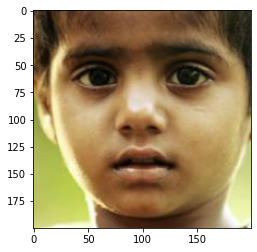

In [60]:
image = load_image()
processed = visualizeLayers(image, model)

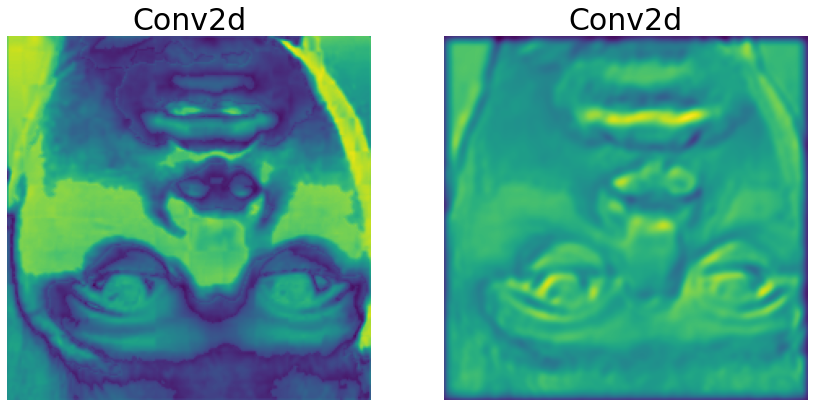

In [64]:
def showPlot(processed, stepSize):
  fig = plt.figure(figsize=(30, 50))
  count = 0
  for i in range(0, len(processed), stepSize):
      a = fig.add_subplot(5, 4, count+1)
      count += 1
      imgplot = plt.imshow(processed[i])
      a.axis("off")
      a.set_title(names[i].split('(')[0], fontsize=30)
  #plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')

# show resnet
showPlot(processed, 10)

In [65]:
model = models.vgg16(pretrained=True)
print(model)
image = load_image()
processed = visualizeLayers(image, model)
showPlot(processed, 1)

Output hidden; open in https://colab.research.google.com to view.